In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
m = 2.5
g = 9.8
b = .5
theta = 40
v = 150
dt = .001
vx = v*np.cos(np.pi/180*theta)
vy = v*np.sin(np.pi/180*theta)
x = 0
y = 0
t = 0
time = [t]
height = [y]
yvelocity = [vy]
distance = [x]
xvelocity = [vx]

In [13]:
def fx():
    global x, vx
    x = x +vx*dt
    vx = vx - (b/m)*vx*dt
    if vx<=0:
        vx =0

def fy():
    global vy , y
    y = y + vy*dt
    vy = vy +(-g-(b/m)*vy)*dt

In [14]:
while True:
    fx()
    fy()
    t = t +dt
    if y<=0:
        break
    time.append(t)
    height.append(y)
    yvelocity.append(vy)
    distance.append(x)
    xvelocity.append(vx)

In [15]:
time_axis = np.array(time).round(3)
height_axis = np.array(height).round(2)
velocity_xaxis = np.array(xvelocity).round(2)
velocity_yaxis = np.array(yvelocity).round(2)
distance_axis = np.array(distance).round(2)

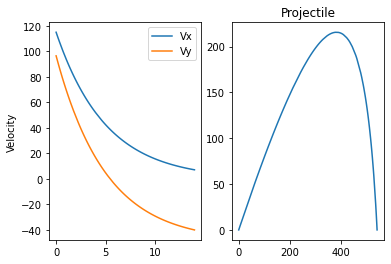

In [16]:
figure, axis = plt.subplots(1,2)

axis[0].plot(time_axis, velocity_xaxis,label = 'Vx')
axis[0].plot(time_axis, velocity_yaxis, label= 'Vy')
axis[0].set_ylabel('Velocity')
axis[1].plot(distance_axis,height_axis)
axis[1].set_title('Projectile')
axis[0].legend()

In [17]:
# time.clear()
# height.clear()
# yvelocity.clear()
# distance.clear()
# xvelocity.clear()
# time

In [18]:
nn = 0
for i in time_axis:
    if i%.5 == 0:
        nn= nn+1
        tt = np.where(time_axis == i)
        n = tt[0][0]
        time.append(time_axis[n])
        height.append(height_axis[n])
        distance.append(distance_axis[n])
        yvelocity.append(velocity_yaxis[n])
        xvelocity.append(velocity_xaxis[n])

In [19]:
df = pd.DataFrame(np.column_stack([time, height, distance, yvelocity, xvelocity]), columns = ('Time','Height','Distance','Vx','Vy'))
df

,Time,Height,Distance,Vx,Vy
0,0.000,0.000000,0.000000,96.418141,114.906666
1,0.001,0.096418,0.114907,96.389058,114.883685
2,0.002,0.192807,0.229790,96.359980,114.860708
3,0.003,0.289167,0.344651,96.330908,114.837736
4,0.004,0.385498,0.459489,96.301842,114.814769
...,...,...,...,...,...
13946,11.500,90.710000,516.940000,-34.420000,11.520000
13947,12.000,73.150000,522.430000,-35.810000,10.420000
13948,12.500,54.920000,527.380000,-37.070000,9.430000
13949,13.000,36.100000,531.870000,-38.200000,8.530000
